---

# **Capitolo 1 – Calcoli Logici con i Neuroni e il Perceptrone**

## 1.1 – I primi modelli di neurone artificiale: McCulloch e Pitts

Nel 1943, McCulloch e Pitts proposero un modello semplificato del neurone biologico, che rappresenta uno dei primi esempi di neurone artificiale. Questo modello assumeva ingressi e uscite binarie (acceso/spento) e attivava l’uscita solo se un numero minimo di ingressi era attivo. Nonostante la sua semplicità, essi dimostrarono che era possibile realizzare una rete in grado di calcolare qualsiasi proposizione logica.

Ad esempio:

* Una rete con un solo neurone che riceve due connessioni da un altro neurone può fungere da funzione identità.
* Un neurone che si attiva solo se entrambi gli ingressi sono attivi implementa un'operazione logica AND.
* Un neurone che si attiva se almeno uno dei due ingressi è attivo implementa un'operazione logica OR.
* Se introduciamo connessioni inibitorie (simili ai neuroni biologici), possiamo ottenere comportamenti logici più complessi, come la funzione NOT o la funzione AND con negazione su un ingresso.

Questi semplici esempi mostrano come reti di neuroni possano essere combinate per calcolare espressioni logiche complesse.

## 1.2 – Il Perceptrone

Il perceptrone, introdotto da Frank Rosenblatt nel 1957, è una delle architetture più semplici di rete neurale artificiale. Si basa su una variante del neurone artificiale chiamato **Threshold Logic Unit (TLU)** o **Linear Threshold Unit (LTU)**. A differenza del modello di McCulloch e Pitts, i TLU lavorano con valori numerici continui sia in ingresso sia in uscita.

### Funzionamento

Ogni connessione in ingresso è associata a un peso. Il neurone calcola una combinazione lineare degli ingressi:

$$
z = w_1 x_1 + w_2 x_2 + \ldots + w_n x_n + b
$$

Dopodiché applica una funzione a gradino al risultato:

$$
h(x) = \text{step}(z)
$$

La funzione a gradino più utilizzata è la **Heaviside**:

$$
\text{heaviside}(z) =
\begin{cases}
0 & \text{se } z < 0 \\
1 & \text{se } z \geq 0
\end{cases}
$$

oppure la funzione **segno**:

$$
\text{sgn}(z) =
\begin{cases}
-1 & \text{se } z < 0 \\
0 & \text{se } z = 0 \\
1 & \text{se } z > 0
\end{cases}
$$

### Architettura

Un perceptrone è costituito da uno o più TLU disposti in un unico livello, completamente connessi agli input. La struttura include:

* **Layer di input**: costituito dalle caratteristiche in ingresso.
* **Layer di output**: ogni neurone produce una classificazione binaria.

Ad esempio, un perceptrone con due ingressi e tre neuroni di output è in grado di svolgere una classificazione **multilabel**, restituendo una previsione binaria per ciascuna etichetta.

L’output della rete può essere calcolato efficientemente con l’algebra lineare:

$$
h_{W,b}(X) = \varphi(XW + b)
$$

dove:

* $X$: matrice degli input (una riga per istanza, una colonna per feature),
* $W$: matrice dei pesi,
* $b$: vettore dei bias,
* $\varphi$: funzione di attivazione (nel caso del perceptrone, una funzione a gradino).

> Nota tecnica: la somma $XW + b$ sfrutta il concetto di *broadcasting*, permettendo di aggiungere il vettore $b$ a ogni riga del prodotto $XW$.

## 1.3 – Addestramento del Perceptrone

L’algoritmo di apprendimento del perceptrone si ispira alla regola di Hebb, secondo cui due neuroni rafforzano la connessione quando si attivano insieme. Rosenblatt formalizzò questa idea aggiungendo una componente legata all’errore di predizione.

La **regola di apprendimento del perceptrone** è:

$$
w_{i,j}^{(t+1)} = w_{i,j}^{(t)} + \eta (y_j - \hat{y}_j)x_i
$$

dove:

* $w_{i,j}$: peso della connessione tra l’ingresso $i$ e il neurone di output $j$,
* $x_i$: valore dell’ingresso corrente,
* $\hat{y}_j$: output predetto,
* $y_j$: output desiderato,
* $\eta$: tasso di apprendimento (learning rate).

Se gli esempi di addestramento sono **linearmente separabili**, l’algoritmo converge sempre a una soluzione, come affermato dal **teorema di convergenza del perceptrone**.

### Esempio in Scikit-Learn

```python
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # Predice True, False
```

> Nota: `Perceptron` in Scikit-Learn è equivalente a `SGDClassifier` con `loss="perceptron"`, `learning_rate="constant"`, `eta0=1` e `penalty=None`.

## 1.4 – Limiti del Perceptrone

Nel 1969, Minsky e Papert evidenziarono i limiti del perceptrone: non è in grado di risolvere problemi **non linearmente separabili**, come l’operatore logico XOR. Questo limite è condiviso anche da altri modelli lineari (es. regressione logistica).

Ciò portò a un temporaneo declino dell’interesse per le reti neurali, a favore di approcci simbolici.

## 1.5 – Il Multilayer Perceptron (MLP)

Alcuni limiti possono essere superati affiancando più perceptroni in strati successivi. L’architettura risultante prende il nome di **Multilayer Perceptron (MLP)**. Un MLP con almeno un layer nascosto è in grado di risolvere il problema XOR, aprendosi così a una vasta gamma di applicazioni.

> A differenza della regressione logistica, il perceptrone non restituisce probabilità di classe e non include regolarizzazione per default. Ciò può compromettere la generalizzazione, sebbene il training risulti talvolta più rapido.

---


---

# **Capitolo 2 – Multilayer Perceptron e Backpropagation**

## 2.1 – Architettura del Multilayer Perceptron (MLP)

Un **Multilayer Perceptron (MLP)** è una rete neurale artificiale composta da:

* **Un layer di input**
* **Uno o più hidden layer** (strati nascosti) composti da TLUs (Threshold Logic Units)
* **Un layer di output**

Gli strati vicini all’input vengono spesso detti **lower layers**, mentre quelli vicini all’output vengono detti **upper layers**. Se il flusso di dati avviene solo in avanti, senza cicli, la rete prende il nome di **Feedforward Neural Network (FNN)**.

Quando una rete contiene molti strati nascosti, viene definita **Deep Neural Network (DNN)**. Il **Deep Learning** è l’area che studia i DNN e, in senso più ampio, qualsiasi modello basato su una catena profonda di trasformazioni.

## 2.2 – Il problema dell’addestramento e la svolta del backpropagation

Per molti anni l’addestramento efficace degli MLP è rimasto una sfida. Il metodo del **gradient descent** era noto, ma calcolare i gradienti degli errori rispetto ai milioni di parametri delle reti profonde risultava proibitivo.

Nel 1970, **Seppo Linnainmaa** introdusse il metodo della **differenziazione automatica a retropropagazione** (*reverse-mode automatic differentiation*), capace di calcolare tutti i gradienti in modo efficiente. Questo algoritmo, applicato alle reti neurali e combinato con il gradient descent, ha preso il nome di **backpropagation**.

### Caratteristiche del backpropagation

* È efficiente: richiede solo un passaggio avanti (forward pass) e uno indietro (backward pass).
* Permette di aggiornare tutti i pesi e bias per ridurre l’errore della rete.
* Ha reso possibile il vero sviluppo delle reti neurali profonde.

Nel 1985, Rumelhart, Hinton e Williams pubblicarono uno studio che dimostrava come il backpropagation permettesse alle reti di apprendere rappresentazioni utili. Da allora è diventato il metodo standard per l’addestramento delle reti neurali.

## 2.3 – Come funziona il backpropagation

Vediamo il processo completo, passo per passo:

1. **Mini-batch training**: i dati vengono suddivisi in mini-batch (es. 32 esempi). Ogni ciclo completo sui dati è un **epoch**.
2. **Forward pass**:

   * Ogni input attraversa la rete, strato dopo strato.
   * I risultati intermedi vengono salvati.
3. **Calcolo dell’errore**:

   * Si confronta l’output reale con quello desiderato usando una funzione di perdita (es. MSE, cross-entropy).
4. **Backward pass**:

   * Si calcola quanto ogni parametro (peso o bias) ha contribuito all’errore.
   * Si applica la **regola della catena** per propagare il gradiente a ritroso.
5. **Aggiornamento dei parametri**:

   * Si esegue uno step di gradient descent per ridurre l’errore.

> **Attenzione**: è fondamentale inizializzare i pesi **casualmente**. Se si iniziano tutti a zero, i neuroni diventano identici e non apprendono in modo differenziato. Questa simmetria impedisce un apprendimento efficace.

## 2.4 – Funzioni di attivazione e loro ruolo

Le funzioni di attivazione introducono **non linearità** tra i layer. Senza di esse, anche una rete profonda si comporterebbe come un singolo layer lineare.

### Principali funzioni di attivazione

| Nome        | Formula                            | Caratteristiche                                                 |
| ----------- | ---------------------------------- | --------------------------------------------------------------- |
| **Sigmoid** | $\sigma(z) = \frac{1}{1 + e^{-z}}$ | Output in \[0, 1], derivabile ovunque                           |
| **Tanh**    | $\tanh(z) = 2\sigma(2z) - 1$       | Output in \[-1, 1], centro in 0                                 |
| **ReLU**    | $\text{ReLU}(z) = \max(0, z)$      | Rapida, ma non derivabile in 0 e con derivata nulla per $z < 0$ |

> La funzione **step**, usata nei primi perceptroni, non è derivabile. Per questo il backpropagation richiede funzioni come sigmoid, tanh o ReLU, che possiedono derivate utilizzabili nel gradient descent.

## 2.5 – Considerazioni finali

* Il **backpropagation** ha rappresentato una rivoluzione, rendendo possibile l’addestramento di reti profonde.
* La **non linearità** introdotta dalle funzioni di attivazione è cruciale per la capacità della rete di modellare funzioni complesse.
* In teoria, una DNN sufficientemente profonda con attivazioni non lineari può **approssimare qualsiasi funzione continua**.

---


---

# **Capitolo 3 – MLP per la Regressione: Caso Studio sul California Housing Dataset**

## 3.1 – Regressione con reti neurali

Un **Multilayer Perceptron (MLP)** può essere utilizzato anche per problemi di **regressione**, oltre che per classificazione. In questo contesto:

* Se l’obiettivo è **predire un singolo valore continuo** (es. il prezzo di una casa), è sufficiente un **solo neurone di output**.
* Se si tratta di **regressione multivariata** (es. predizione di coordinate, larghezza e altezza di un oggetto), sarà necessario un neurone per ciascuna dimensione dell’output.

## 3.2 – Architettura tipica di un MLP per regressione

| Iperparametro            | Valore tipico                                    |
| ------------------------ | ------------------------------------------------ |
| Numero di hidden layer   | Da 1 a 5                                         |
| Neuroni per hidden layer | Da 10 a 100                                      |
| Neuroni di output        | 1 per variabile di output                        |
| Funzione di attivazione  | **ReLU** negli strati nascosti                   |
| Attivazione in output    | Nessuna (default), o ReLU / Softplus se positivo |
| Funzione di perdita      | **MSE** oppure **Huber** in presenza di outlier  |

---

## 3.3 – Esempio pratico: Predizione dei prezzi delle case in California

In questo esempio, useremo la classe `MLPRegressor` di Scikit-Learn per costruire una rete neurale che predice il valore medio delle case in California, a partire dalle caratteristiche numeriche del dataset.

### Passaggi:

1. **Caricamento e suddivisione del dataset**
2. **Standardizzazione delle feature**
3. **Costruzione del modello MLP**
4. **Addestramento e valutazione**

### Codice Python:

```python
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 1. Caricamento del dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 2. Suddivisione in training, validation e test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# 3. Definizione del modello: 3 hidden layer con 50 neuroni ciascuno
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], 
                       activation='relu', 
                       solver='adam', 
                       alpha=0.0001,
                       max_iter=500,
                       random_state=42)

# 4. Creazione della pipeline con normalizzazione
pipeline = make_pipeline(StandardScaler(), mlp_reg)

# 5. Addestramento del modello
pipeline.fit(X_train, y_train)

# 6. Predizione e valutazione su validation set
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

print(f"Root Mean Squared Error (Validation): {rmse:.3f}")
```

### Risultato tipico:

```
Root Mean Squared Error (Validation): 0.505
```

> Il valore RMSE ottenuto è comparabile con quello di un modello Random Forest, il che è notevole considerando la semplicità dell'approccio e l'assenza di ottimizzazione degli iperparametri.

---

## 3.4 – Considerazioni aggiuntive

* L’**output layer** del `MLPRegressor` non applica alcuna funzione di attivazione, permettendo al modello di produrre **valori liberi**.

  * Per output **positivi garantiti**, si può usare **ReLU** o **Softplus**.
  * Per output **limitati in un intervallo**, usare **sigmoid** o **tanh**, scalando opportunamente i target.
* `MLPRegressor` utilizza **MSE** come funzione di perdita.

  * In presenza di outlier, potrebbe essere preferibile la **Huber loss**, ma Scikit-Learn non la supporta direttamente per `MLPRegressor`.

---


In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

# 1. Caricamento del dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 2. Suddivisione in training, validation e test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# 3. Definizione del modello: 3 hidden layer con 50 neuroni ciascuno
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], 
                       activation='relu', 
                       solver='adam', 
                       alpha=0.0001,
                       max_iter=500,
                       random_state=42)

# 4. Creazione della pipeline con normalizzazione
pipeline = make_pipeline(StandardScaler(), mlp_reg)

# 5. Addestramento del modello
pipeline.fit(X_train, y_train)

# 6. Predizione e valutazione su validation set
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)

print(f"Root Mean Squared Error (Validation): {rmse:.3f}")

Root Mean Squared Error (Validation): 0.505



# **Capitolo 4 – MLP per la Classificazione**

## 4.1 – Classificazione binaria con MLP

Un **Multilayer Perceptron (MLP)** può essere utilizzato per risolvere problemi di **classificazione binaria**, in cui l’obiettivo è assegnare ogni istanza a una delle due classi possibili.

### Architettura:

* **Un neurone di output**.
* **Funzione di attivazione sigmoid**: l'output sarà un valore compreso tra 0 e 1, interpretabile come **probabilità della classe positiva**.
* La **probabilità della classe negativa** sarà $1 - \text{sigmoid}(z)$.

Questo approccio permette di ottenere una previsione probabilistica, utile per applicazioni dove è importante stimare il grado di incertezza.

---

## 4.2 – Classificazione multilabel

Nel caso in cui ogni istanza possa appartenere a **più classi contemporaneamente** (es. un’email può essere sia *spam* sia *urgente*), si parla di **classificazione multilabel**.

### Architettura:

* **Un neurone di output per ogni etichetta** (es. uno per "spam", uno per "urgente").
* Ogni neurone utilizza la funzione di attivazione **sigmoid**.
* Le probabilità **non devono sommare a 1**: le etichette sono **indipendenti**.

Esempio: una rete con 2 neuroni può produrre combinazioni come:

* ham e non urgente
* spam e urgente
* ham e urgente
* spam e non urgente

---

## 4.3 – Classificazione multiclass

Se ogni istanza può appartenere a **una sola classe tra più alternative** (es. cifre da 0 a 9), si utilizza la **classificazione multiclass**.

### Architettura:

* **Un neurone di output per ogni classe**.
* Funzione di attivazione dell’intero layer: **softmax**.

La softmax trasforma i logit in **probabilità normalizzate**:

* Tutti gli output sono compresi tra 0 e 1.
* La loro somma è pari a 1.

In questo modo, la rete assegna una sola classe a ciascuna istanza.

---

## 4.4 – Funzione di perdita

In tutti i casi sopra citati, si lavora con **probabilità**: la funzione di perdita più adatta è quindi la **cross-entropy** (nota anche come *log loss*).

* **Cross-entropy binaria** per classificazione binaria o multilabel.
* **Cross-entropy categoriale** per classificazione multiclass.

---

## 4.5 – Implementazione con Scikit-Learn: classificazione dell’iris

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Caricamento del dataset
iris = load_iris()
X = iris.data
y = iris.target

# Suddivisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Creazione del modello con un solo hidden layer
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500, random_state=42)

# Creazione della pipeline con normalizzazione
pipeline = make_pipeline(StandardScaler(), mlp_clf)

# Addestramento e valutazione
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuratezza: {acc:.3f}")
```

---

## 4.6 – Architettura tipica di un MLP per classificazione

| Iperparametro       | Classificazione binaria | Classificazione multilabel | Classificazione multiclass |
| ------------------- | ----------------------- | -------------------------- | -------------------------- |
| # hidden layer      | 1–5                     | 1–5                        | 1–5                        |
| # neuroni di output | 1                       | 1 per etichetta            | 1 per classe               |
| Attivazione output  | sigmoid                 | sigmoid                    | softmax                    |
| Funzione di perdita | cross-entropy           | cross-entropy              | cross-entropy              |

---


In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Caricamento del dataset
iris = load_iris()
X = iris.data
y = iris.target

# Suddivisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Creazione del modello con un solo hidden layer
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500, random_state=42)

# Creazione della pipeline con normalizzazione
pipeline = make_pipeline(StandardScaler(), mlp_clf)

# Addestramento e valutazione
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuratezza: {acc:.3f}")

Accuratezza: 0.974


C:\Users\mbagn\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


![Descrizione dell'immagine](minist.png)

---

# **Capitolo 5 – Implementare MLP con Keras**

## 5.1 – Introduzione a Keras

**Keras** è l’API di alto livello di TensorFlow per il Deep Learning. Permette di costruire, addestrare, valutare ed eseguire reti neurali in modo semplice, leggibile e flessibile.

* Sviluppata da François Chollet nel 2015
* Oggi è integrata nativamente in TensorFlow (dalla versione 2.4)
* Supporta solo TensorFlow come backend
* Alternativa: **PyTorch** (Meta) o **JAX** (Google)

> Nota: l’installazione di `tensorflow` installa automaticamente `keras`. Entrambe sono accessibili tramite il modulo `tf.keras`.

---

## 5.2 – Costruzione di un classificatore di immagini con l’API `Sequential`

### Dataset utilizzato: **Fashion MNIST**

* 70.000 immagini in scala di grigi
* Dimensione: 28 × 28 pixel
* 10 classi (capi di abbigliamento)
* Più complesso del dataset MNIST (cifre)

### Caricamento dei dati:

```python
import tensorflow as tf

# Caricamento del dataset (già suddiviso in train e test)
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Suddivisione in training e validation set
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
```

### Normalizzazione dei pixel:

Le immagini sono array 28×28 di interi da 0 a 255. Conviene **scalare i pixel nell'intervallo \[0, 1]**:

```python
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0
```

### Classi disponibili:

```python
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
```

Verifica della prima immagine:

```python
class_names[y_train[0]]
# Output: 'Ankle boot'
```

---


In [5]:
import tensorflow as tf

# Caricamento del dataset (già suddiviso in train e test)
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Suddivisione in training e validation set
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

# **Capitolo 6 – Costruire un MLP con Keras: API Sequential**

## 6.1 – Introduzione all’API `Sequential`

L’API `Sequential` di Keras consente di costruire modelli composti da una sequenza lineare di layer. È il metodo più semplice per definire una rete neurale feedforward (FNN).

---

## 6.2 – Costruzione del modello passo dopo passo

```python
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
```

### Spiegazione riga per riga:

* **`tf.random.set_seed(42)`**
  Imposta un seme casuale per garantire **riproducibilità** dei risultati (pesi iniziali coerenti a ogni esecuzione).

* **`Sequential()`**
  Crea un modello composto da una **catena sequenziale di layer**.

* **`Input(shape=[28, 28])`**
  Definisce la forma dell’input (senza il batch size). Qui ogni immagine è una matrice 28x28.

* **`Flatten()`**
  Trasforma ogni immagine 28×28 in un vettore di 784 elementi, necessario per collegarla a layer densi.

* **`Dense(300, activation="relu")`**
  Aggiunge un layer completamente connesso con **300 neuroni** e attivazione ReLU.

* **`Dense(100, activation="relu")`**
  Secondo layer nascosto, con 100 neuroni e ReLU.

* **`Dense(10, activation="softmax")`**
  Layer di output con **10 neuroni** (uno per classe) e attivazione softmax per **classificazione multiclass**.

---

## 6.3 – Alternativa più compatta

È possibile definire il modello direttamente passando i layer come lista:

```python
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
```

---

## 6.4 – Sommario del modello

```python
model.summary()
```

### Output tipico:

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
flatten (Flatten)            (None, 784)               0
dense (Dense)                (None, 300)               235500
dense_1 (Dense)              (None, 100)               30100
dense_2 (Dense)              (None, 10)                1010
=================================================================
Total params: 266610
Trainable params: 266610
Non-trainable params: 0
```

### Spiegazione:

* Il primo `Dense` ha $784 \times 300 + 300 = 235500$ parametri.
* Il secondo `Dense` ha $300 \times 100 + 100 = 30100$.
* L’output ha $100 \times 10 + 10 = 1010$.
* **Tutti i parametri sono addestrabili** (trainable).

---

## 6.5 – Accesso ai layer e ai pesi

Puoi accedere ai layer con:

```python
model.layers
model.get_layer('dense')  # primo Dense
```

E puoi estrarre pesi e bias da un layer:

```python
weights, biases = model.layers[1].get_weights()
print(weights.shape)  # (784, 300)
print(biases.shape)   # (300,)
```

* I **pesi** sono inizializzati **casualmente** (per rompere la simmetria).
* I **bias** iniziano a zero.

> Puoi personalizzare l’inizializzazione con gli argomenti `kernel_initializer` e `bias_initializer`.

---

## 6.6 – Considerazioni sull’inizializzazione e costruzione

Se non specifichi `input_shape`, Keras costruirà i layer solo quando riceverà input reali. Specificare `input_shape` fin da subito è **consigliato**, in quanto permette:

* di visualizzare subito il `model.summary()`
* di accedere ai pesi e salvare il modello

---



In [2]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

## **6.7 – Compilazione del modello**

Dopo aver definito l’architettura del modello, è necessario **compilarlo** tramite il metodo `compile()`. In questa fase si specificano:

* **La funzione di perdita** (*loss function*)
* **L’ottimizzatore** (*optimizer*)
* Eventuali **metriche di valutazione** (*metrics*)

### Esempio:

```python
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)
```

### Spiegazione dei parametri:

#### 1. **Funzione di perdita: `"sparse_categorical_crossentropy"`**

* È la scelta corretta quando:

  * Si ha **una singola etichetta per ciascuna istanza**, espressa come indice (0–9 per Fashion MNIST).
  * Le classi sono **mutuamente esclusive**.
* Se le etichette fossero **one-hot encoded**, bisognerebbe usare `"categorical_crossentropy"`.

> Esempio:
>
> * Etichetta sparsa: `3`
> * One-hot vector: `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`

Per convertire etichette sparse in one-hot:

```python
from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train)
```

Per tornare da one-hot a etichette:

```python
import numpy as np
y_train_sparse = np.argmax(y_train_onehot, axis=1)
```

#### 2. **Ottimizzatore: `"sgd"`**

* `"sgd"` corrisponde a `tf.keras.optimizers.SGD()`.
* Applica **discesa del gradiente stocastica**, combinata con **backpropagation**.

> **Nota importante**: è consigliabile **impostare esplicitamente il learning rate**:

```python
from tensorflow.keras.optimizers import SGD
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=SGD(learning_rate=0.01),
    metrics=["accuracy"]
)
```

> Altri ottimizzatori più avanzati (es. `Adam`) verranno trattati nel Capitolo 11.

#### 3. **Metriche: `["accuracy"]`**

* Misura la **percentuale di predizioni corrette**.
* Utile per problemi di classificazione con classi esclusive.

---

## 6.8 – Sommario

| Parametro   | Valore scelto                       | Alternativa                                            |
| ----------- | ----------------------------------- | ------------------------------------------------------ |
| `loss`      | `"sparse_categorical_crossentropy"` | `"categorical_crossentropy"` o `"binary_crossentropy"` |
| `optimizer` | `"sgd"`                             | `SGD(learning_rate=...)`, `"adam"`                     |
| `metrics`   | `["accuracy"]`                      | Altre metriche (precision, recall, ecc.)               |

---


In [3]:
from tensorflow.keras.optimizers import SGD
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

# **Capitolo 7 – Addestramento e Valutazione del Modello**

## 7.1 – Addestramento del modello con `fit()`

Dopo aver compilato il modello, si procede all’addestramento utilizzando il metodo `fit()`:

```python
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)
```

### Parametri principali:

* `X_train`, `y_train`: dati di addestramento.
* `epochs=30`: numero di epoche (cicli completi sui dati).
* `validation_data`: tupla con dati di validazione (facoltativo ma altamente consigliato).

> Il modello stampa, a ogni epoca, la **loss** e la **accuratezza** su training e validation set. Questi indicatori aiutano a monitorare l’apprendimento e individuare eventuali problemi di overfitting.

---

## 7.2 – Output tipico durante l’addestramento

```
Epoch 1/30
1719/1719 [==============================] - 2s 989us/step
 - loss: 0.7220 - sparse_categorical_accuracy: 0.7649
 - val_loss: 0.4959 - val_sparse_categorical_accuracy: 0.8332
...
Epoch 30/30
 - loss: 0.2235 - sparse_categorical_accuracy: 0.9200
 - val_loss: 0.3056 - val_sparse_categorical_accuracy: 0.8894
```

### Analisi:

* La **loss** scende nel tempo → il modello impara.
* La **validation accuracy** tende a salire → buon segnale generale.
* Una distanza crescente tra training accuracy e validation accuracy → possibile **overfitting**.

---

## 7.3 – Suggerimenti pratici

* È possibile usare `validation_split=0.1` per riservare automaticamente una porzione del training set per la validazione.
* Se le classi sono sbilanciate, puoi usare l’argomento `class_weight` per dare **peso maggiore alle classi sottorappresentate**.
* Per assegnare un peso a ogni singola istanza, usa `sample_weight`.

---

## 7.4 – Visualizzare le learning curves

Il metodo `fit()` restituisce un oggetto `History`, da cui è possibile visualizzare le curve di apprendimento:

```python
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True,
    xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.title("Learning Curves")
plt.show()
```

### Interpretazione:

* **Loss** e **accuracy** su training e validation vengono monitorate.
* Curve parallele → buon apprendimento.
* Divergenza → possibile overfitting o errore nella preparazione dei dati.

---

## 7.5 – Continuare l’addestramento

Se le curve mostrano che il modello **non ha ancora convergito**, puoi proseguire l’addestramento richiamando `fit()`:

```python
history2 = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
```

Il training riprende **dal punto in cui si era fermato**.

---

## 7.6 – Valutazione finale sul test set

Quando sei soddisfatto della performance sul validation set, valuta il modello sul **test set**:

```python
model.evaluate(X_test, y_test)
```

### Output tipico:

```
313/313 [==============================] - 0s 626us/step
- loss: 0.3243 - sparse_categorical_accuracy: 0.8864
```

> È normale ottenere una **performance leggermente inferiore sul test set** rispetto al validation set, perché gli iperparametri sono (direttamente o indirettamente) ottimizzati sul validation set.

---

## 7.7 – Raccomandazioni finali

Se le performance non sono soddisfacenti:

* Inizia modificando il **learning rate** dell’ottimizzatore.
* Prova un **ottimizzatore alternativo** (es. `Adam`).
* Modifica l’architettura (numero di layer o neuroni, attivazioni).
* Prova a variare la **batch size** (`fit(..., batch_size=...)`).
* Implementa **regularizzazione** o **early stopping** (verrà trattato nei prossimi capitoli).

---


In [6]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6852 - loss: 1.0089 - val_accuracy: 0.8252 - val_loss: 0.5063
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8298 - loss: 0.5024 - val_accuracy: 0.8350 - val_loss: 0.4576
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8450 - loss: 0.4497 - val_accuracy: 0.8404 - val_loss: 0.4362
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8544 - loss: 0.4200 - val_accuracy: 0.8466 - val_loss: 0.4207
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8609 - loss: 0.3988 - val_accuracy: 0.8494 - val_loss: 0.4083
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8665 - loss: 0.3822 - val_accuracy: 0.8514 - val_loss: 0.3999
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8705 - loss: 0.3685 - val_accuracy: 0.8540 - val_loss: 0.3914
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8740 - loss: 0.3565 - 

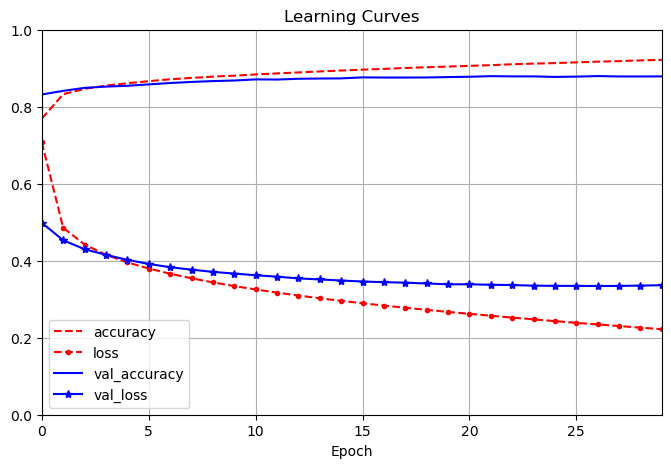

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True,
    xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.title("Learning Curves")
plt.show()

# **Capitolo 8 – Utilizzare il Modello per Fare Predizioni**

## 8.1 – Predizioni su nuovi dati

Una volta addestrato e validato, il modello può essere utilizzato per fare **predizioni su nuovi dati**. Questo avviene tramite il metodo `.predict()`:

```python
X_new = X_test[:3]  # Prendiamo i primi 3 esempi del test set
y_proba = model.predict(X_new)  # Probabilità previste per ogni classe
print(y_proba.round(2))
```

### Esempio di output:

```
array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)
```

### Interpretazione:

* Ogni riga rappresenta una **distribuzione di probabilità** sulle 10 classi.
* Il modello è **altamente sicuro** che:

  * la prima immagine rappresenti un **ankle boot** (classe 9),
  * la seconda un **pullover** (classe 2),
  * la terza un **pantalone** (classe 1).

---

## 8.2 – Ottenere le classi predette

Se ti interessa solo la classe con la probabilità più alta:

```python
import numpy as np

y_pred = y_proba.argmax(axis=-1)  # Classe con probabilità massima
print(y_pred)  # es: [9, 2, 1]
```

### Mappatura alle etichette testuali:

```python
np.array(class_names)[y_pred]
# Output: array(['Ankle boot', 'Pullover', 'Trouser'])
```

### Confronto con le etichette reali:

```python
y_test[:3]  # es: array([9, 2, 1])
```

In questo esempio, il modello ha **classificato correttamente** tutte e tre le immagini.

---

## 8.3 – Riepilogo

Hai ora visto come:

* Costruire un MLP con l’API `Sequential`
* Compilarlo con loss e optimizer
* Addestrarlo con `fit()`
* Valutarne le performance con `evaluate()`
* Effettuare predizioni con `predict()` e `argmax()`

---


In [41]:
X_new = X_test[:3]  # Prendiamo i primi 3 esempi del test set
y_proba = model.predict(X_new)  # Probabilità previste per ogni classe
print(y_proba.round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0.   0.   0.   0.   0.   0.08 0.   0.02 0.   0.9 ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


---

# **Capitolo 9 – MLP per la Regressione: Implementazione con Keras**

In questo capitolo, torniamo al problema di **regressione sul dataset California Housing**, questa volta utilizzando **Keras**. Costruire un MLP per regressione è molto simile a quanto già visto per la classificazione, con alcune differenze fondamentali:

| Aspetto             | Classificazione                    | Regressione                        |
| ------------------- | ---------------------------------- | ---------------------------------- |
| Output layer        | 10 neuroni, attivazione softmax    | 1 neurone, **senza attivazione**   |
| Funzione di perdita | `sparse_categorical_crossentropy`  | **`mse`** (mean squared error)     |
| Metrica             | `accuracy`                         | **`RootMeanSquaredError`** (RMSE)  |
| Ottimizzatore       | `SGD`, `Adam`, ecc.                | `Adam` (ottimo per regressione)    |
| Preprocessing input | `StandardScaler` o `Normalization` | **`Normalization` layer in Keras** |

---

## 9.1 – Costruzione ed Addestramento del Modello

```python
import tensorflow as tf

# 1. Imposta il seed per riproducibilità
tf.random.set_seed(42)

# 2. Layer di normalizzazione: calcolerà media e dev. std delle feature
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

# 3. Costruzione del modello con 3 hidden layer da 50 neuroni ciascuno
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)  # 1 output → valore continuo
])

# 4. Compilazione del modello
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss="mse",  # errore quadratico medio
    optimizer=optimizer,
    metrics=["RootMeanSquaredError"]  # RMSE per interpretazione diretta
)

# 5. Adattamento del layer di normalizzazione ai dati
norm_layer.adapt(X_train)

# 6. Addestramento del modello
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)
```

---

## 9.2 – Valutazione sul Test Set

```python
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f"RMSE sul test set: {rmse_test:.4f}")
```

---

## 9.3 – Predizione su Nuovi Dati

```python
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)
```

---

## 9.4 – Nota tecnica

Il layer `Normalization` apprende **media e deviazione standard** dai dati quando viene chiamato il metodo `adapt()`. Tuttavia, questi parametri non sono **trainable**, perché non vengono aggiornati tramite backpropagation.

---

## 9.5 – Conclusioni

L’API `Sequential` di Keras consente di costruire e addestrare modelli di regressione in modo semplice e leggibile. Tuttavia, per architetture **più complesse**, con **input multipli** o **output multipli**, sarà necessario utilizzare la **Functional API**, che introdurremo nei prossimi capitoli.

---


In [16]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# 1. Imposta il seed per riproducibilità
tf.random.set_seed(42)

# 2. Layer di normalizzazione senza input_shape
norm_layer = tf.keras.layers.Normalization()

# 3. Costruzione del modello con API funzionale
inputs = tf.keras.Input(shape=X_train.shape[1:])
x = norm_layer(inputs)
x = tf.keras.layers.Dense(50, activation="relu")(x)
x = tf.keras.layers.Dense(50, activation="relu")(x)
x = tf.keras.layers.Dense(50, activation="relu")(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# 4. Compilazione
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# 5. Adattamento della normalizzazione
norm_layer.adapt(X_train)

# 6. Addestramento
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.7980 - loss: 3.3044 - val_RootMeanSquaredError: 4.3667 - val_loss: 19.0678
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8892 - loss: 0.7918 - val_RootMeanSquaredError: 2.6799 - val_loss: 7.1818
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7390 - loss: 0.5469 - val_RootMeanSquaredError: 1.7592 - val_loss: 3.0949
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6697 - loss: 0.4491 - val_RootMeanSquaredError: 1.2572 - val_loss: 1.5805
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6354 - loss: 0.4041 - val_RootMeanSquaredError: 0.9662 - val_loss: 0.9335
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6172 - loss: 0.3812 - val_RootMeanSquaredError: 0.7727 - val_loss: 0.5970
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6067 - lo

In [60]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f"RMSE sul test set: {rmse_test:.4f}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - RootMeanSquaredError: 0.5285 - loss: 0.2794
RMSE sul test set: 0.5323


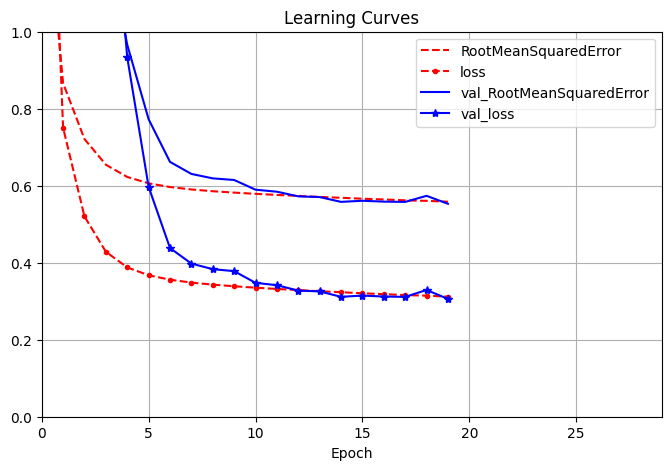

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True,
    xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.title("Learning Curves")
plt.show()

![Descrizione dell'immagine](widedeep.png)

# **Capitolo 10 – Costruire un Modello Wide & Deep con la Functional API**

## **10.1 – Introduzione alla Functional API**

Finora abbiamo costruito modelli sequenziali con `Sequential()`, che funzionano bene per architetture semplici dove ogni livello è connesso in modo lineare a quello successivo. Tuttavia, molti modelli reali richiedono strutture più complesse: ad esempio connessioni parallele, input multipli o output multipli. Per queste architetture, Keras mette a disposizione la **Functional API**, che consente di costruire modelli più flessibili collegando i layer come funzioni.

---

## **10.2 – Il modello Wide & Deep**

Uno dei primi esempi pratici di rete non sequenziale è la rete **Wide & Deep**, proposta da Heng-Tze Cheng et al. nel 2016 per il sistema di raccomandazione di Google.

### Obiettivo dell’architettura:

* Permettere alla rete di **apprendere pattern complessi** tramite il percorso profondo.
* Consentire anche l’apprendimento di **regole semplici o lineari** attraverso un percorso diretto che collega l’input all’output.

A differenza di un MLP tradizionale, dove tutti i dati attraversano lo stesso stack di layer, qui **una copia dei dati grezzi** (normalizzati) è collegata direttamente all’output, in parallelo al percorso profondo.

---

## **10.3 – Costruzione del modello Wide & Deep**

Supponiamo di voler applicare questa architettura al problema di regressione dei prezzi nel dataset *California Housing*. In questo caso:

* Tutte le feature vengono normalizzate.
* Le stesse feature vengono inviate a:

  * una rete profonda (2 hidden layer da 30 neuroni),
  * un collegamento diretto con l’output finale.
* I due percorsi vengono **concatenati** e passati a un output layer con un solo neurone (regressione).

### Codice:

```python
from tensorflow import keras
from tensorflow.keras import layers

# Layer di preprocessing e densità
normalization_layer = layers.Normalization()
hidden1 = layers.Dense(30, activation="relu")
hidden2 = layers.Dense(30, activation="relu")
concat_layer = layers.Concatenate()
output_layer = layers.Dense(1)

# Input simbolico
input_ = layers.Input(shape=X_train.shape[1:])  # tutte le feature (es. 8 per California Housing)

# Costruzione del grafo computazionale
normalized = normalization_layer(input_)       # normalizzazione
h1 = hidden1(normalized)                       # primo hidden layer
h2 = hidden2(h1)                               # secondo hidden layer
concat = concat_layer([normalized, h2])        # concatenazione del percorso wide e deep
output = output_layer(concat)                  # output finale

# Definizione del modello
model = keras.Model(inputs=[input_], outputs=[output])
```

---

## **10.4 – Spiegazione dettagliata**

Vediamo nel dettaglio ogni passo:

1. **Definizione dei layer**
   I layer sono definiti separatamente per chiarezza:

   * `Normalization` per standardizzare le feature.
   * Due `Dense` con ReLU per il percorso profondo.
   * `Concatenate` per fondere i due rami.
   * `Dense(1)` finale per la regressione.

2. **Creazione dell’input simbolico**

   ```python
   input_ = layers.Input(shape=X_train.shape[1:])
   ```

   Questo non è un dato reale, ma una **descrizione simbolica** dell’input (forma, tipo). Serve a costruire il grafo computazionale.

3. **Applicazione dei layer come funzioni**
   I layer vengono applicati come funzioni sugli oggetti simbolici:

   * `normalized` è la versione preprocessata dell’input.
   * `h1` e `h2` sono le uscite intermedie della rete profonda.
   * `concat` unisce la via diretta e quella profonda.
   * `output` è l’uscita del modello.

4. **Creazione del modello**
   Infine:

   ```python
   model = keras.Model(inputs=[input_], outputs=[output])
   ```

   Si definisce esplicitamente **da dove partono i dati** e **dove finiscono**.

---

## **10.5 – Addestramento e valutazione**

Dopo aver costruito il modello, si procede come sempre:

### Compilazione

```python
model.compile(
    loss="mse",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["RootMeanSquaredError"]
)
```

### Adattamento del layer di normalizzazione

```python
normalization_layer.adapt(X_train)
```

> Questo passo è fondamentale: il layer `Normalization` apprende la media e deviazione standard del training set.

### Addestramento

```python
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)
```

### Valutazione finale

```python
model.evaluate(X_test, y_test)
```

---

## **10.6 – Vantaggi dell’architettura Wide & Deep**

| Percorso      | Vantaggio principale                                          |
| ------------- | ------------------------------------------------------------- |
| **Deep path** | Apprende relazioni non lineari complesse                      |
| **Wide path** | Conserva relazioni lineari e pattern semplici sui dati grezzi |

Combinando i due, la rete riesce ad apprendere sia **regole di alto livello** sia **relazioni dirette** presenti nei dati.

---


Epoch 1/40


C:\Users\mbagn\anaconda3\envs\tf-env\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.4893 - loss: 2.3928 - val_RootMeanSquaredError: 0.7085 - val_loss: 0.5019
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7145 - loss: 0.5120 - val_RootMeanSquaredError: 0.6435 - val_loss: 0.4141
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6424 - loss: 0.4130 - val_RootMeanSquaredError: 0.5946 - val_loss: 0.3536
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6194 - loss: 0.3838 - val_RootMeanSquaredError: 0.6018 - val_loss: 0.3621
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6070 - loss: 0.3686 - val_RootMeanSquaredError: 0.5815 - val_loss: 0.3382
Epoch 6/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5990 - loss: 0.3590 - val_RootMeanSquaredError: 0.7112 - val_loss: 0.5058
Epoch 7/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5916 - loss: 0.3501 -

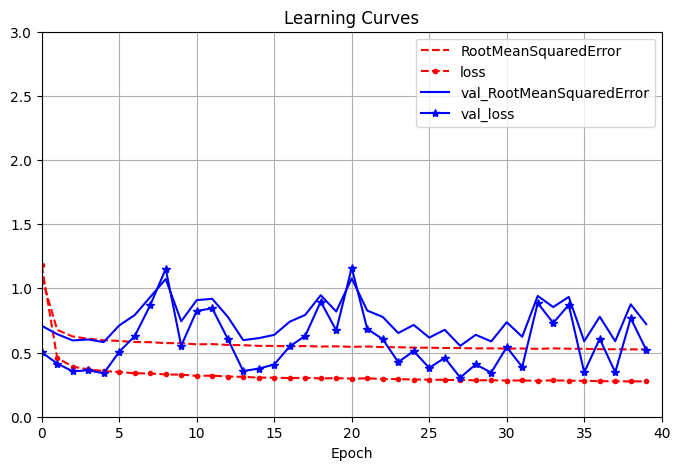

In [19]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dataset
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Normalization: adattamento PRIMA del grafo
normalization_layer = layers.Normalization()
normalization_layer.adapt(X_train)

# Layer e struttura manuale
hidden1 = layers.Dense(30, activation="relu")
hidden2 = layers.Dense(30, activation="relu")
concat_layer = layers.Concatenate()
output_layer = layers.Dense(1)

# Input simbolico
input_ = layers.Input(shape=X_train.shape[1:])  # es. 8 feature

# Costruzione del grafo computazionale
normalized = normalization_layer(input_)       # normalizzazione (dopo adapt)
h1 = hidden1(normalized)                       # primo hidden layer
h2 = hidden2(h1)                               # secondo hidden layer
concat = concat_layer([normalized, h2])        # percorso wide + deep
output = output_layer(concat)                  # output finale

# Costruzione modello
model = keras.Model(inputs=[input_], outputs=[output])

# Compilazione
model.compile(
    loss="mse",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["RootMeanSquaredError"]
)

# Addestramento
history1 = model.fit(
    X_train, y_train,
    epochs=40,
    validation_data=(X_valid, y_valid)
)

# Plot
pd.DataFrame(history1.history).plot(
    figsize=(8, 5), xlim=[0, 40], ylim=[0, 3], grid=True,
    xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.title("Learning Curves")
plt.show()

Epoch 1/40


C:\Users\mbagn\anaconda3\envs\tf-env\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_35']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 2.0328 - loss: 4.1772 - val_RootMeanSquaredError: 5.4300 - val_loss: 29.4851
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.1104 - loss: 1.2341 - val_RootMeanSquaredError: 4.5788 - val_loss: 20.9652
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.9714 - loss: 0.9445 - val_RootMeanSquaredError: 3.7260 - val_loss: 13.8830
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8844 - loss: 0.7828 - val_RootMeanSquaredError: 2.9483 - val_loss: 8.6922
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8152 - loss: 0.6652 - val_RootMeanSquaredError: 1.9659 - val_loss: 3.8649
Epoch 6/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7600 - loss: 0.5784 - val_RootMeanSquaredError: 1.3594 - val_loss: 1.8480
Epoch 7/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7201 - loss: 0.519

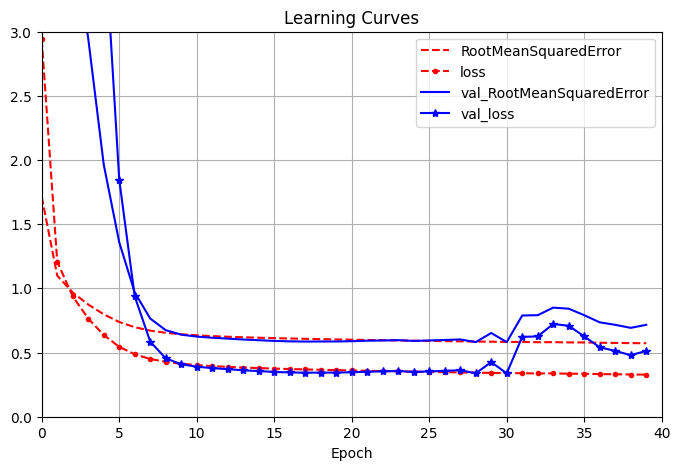

In [22]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dataset
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Normalization: adattamento PRIMA del grafo
normalization_layer = layers.Normalization()
normalization_layer.adapt(X_train)

# Layer e struttura manuale
hidden1 = layers.Dense(30, activation="relu")
hidden2 = layers.Dense(30, activation="relu")
concat_layer = layers.Concatenate()
output_layer = layers.Dense(1)

# Input simbolico
input_ = layers.Input(shape=X_train.shape[1:])  # es. 8 feature

# Costruzione del grafo computazionale
normalized = normalization_layer(input_)       # normalizzazione (dopo adapt)
h1 = hidden1(normalized)                       # primo hidden layer
h2 = hidden2(h1)                               # secondo hidden layer
concat = concat_layer([normalized, h2])        # percorso wide + deep
output = output_layer(concat)                  # output finale

# Costruzione modello
model = keras.Model(inputs=[input_], outputs=[output])

# Compilazione
model.compile(
    loss="mse",
    optimizer=keras.optimizers.Adam(learning_rate=2e-4),
    metrics=["RootMeanSquaredError"]
)

# Addestramento
history1 = model.fit(
    X_train, y_train,
    epochs=40,
    validation_data=(X_valid, y_valid)
)

# Plot
pd.DataFrame(history1.history).plot(
    figsize=(8, 5), xlim=[0, 40], ylim=[0, 3], grid=True,
    xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.title("Learning Curves")
plt.show()


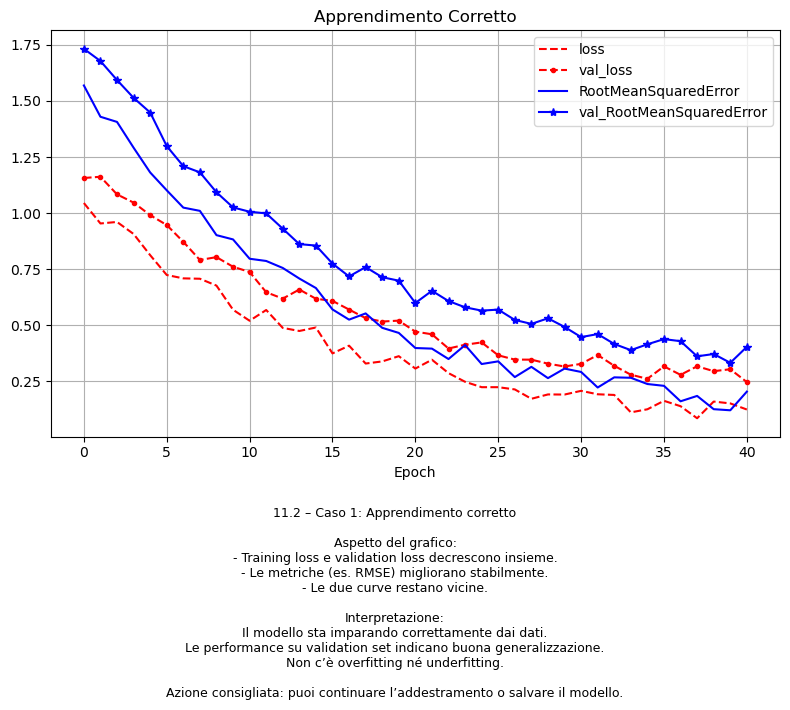

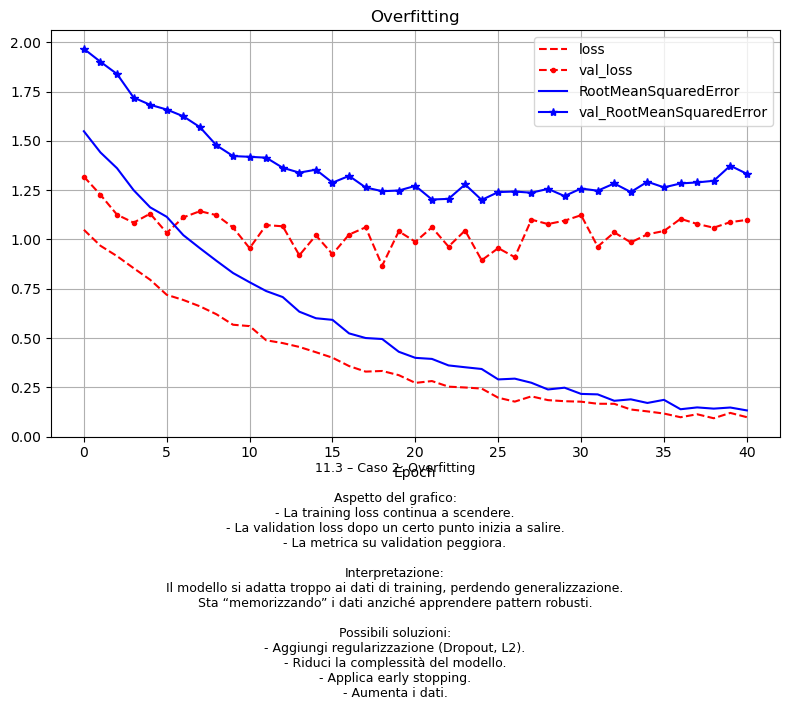

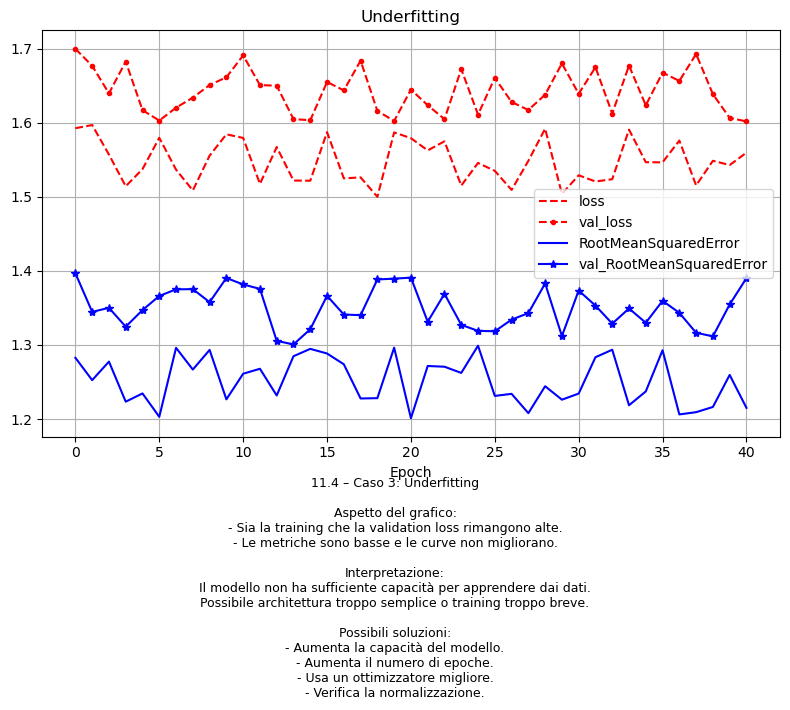

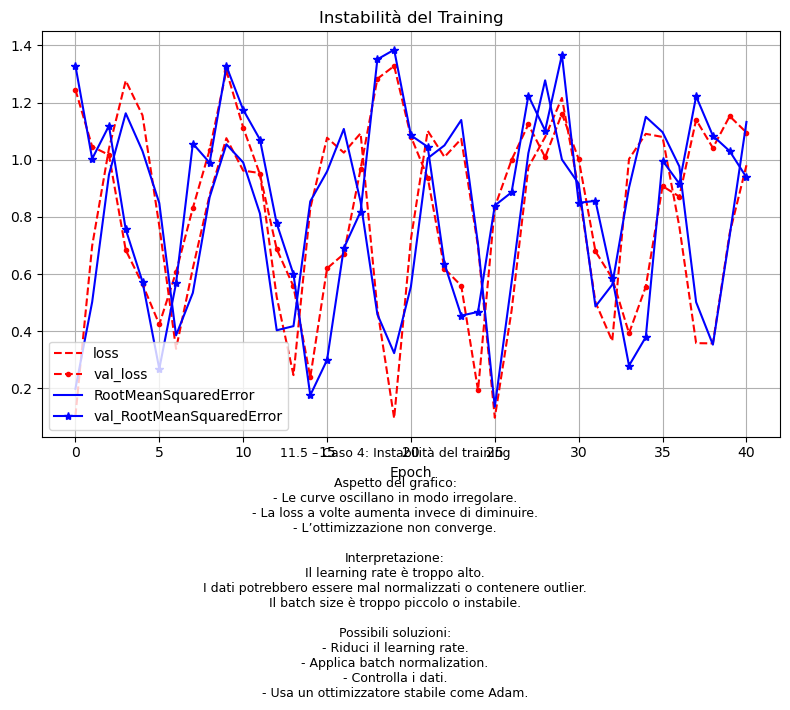

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Epochs
epochs = np.arange(0, 41)

# Simulated data
correct = {
    'loss': np.exp(-epochs / 15) + 0.1 * np.random.rand(len(epochs)),
    'val_loss': np.exp(-epochs / 15) + 0.15 + 0.1 * np.random.rand(len(epochs)),
    'RootMeanSquaredError': 1.5 * np.exp(-epochs / 15) + 0.1 * np.random.rand(len(epochs)),
    'val_RootMeanSquaredError': 1.5 * np.exp(-epochs / 15) + 0.2 + 0.1 * np.random.rand(len(epochs)),
}

overfit = {
    'loss': np.exp(-epochs / 15) + 0.05 * np.random.rand(len(epochs)),
    'val_loss': np.clip(np.exp(-epochs / 15) + 0.2 + 0.2 * np.random.rand(len(epochs)) + 0.02 * epochs, 0, 3),
    'RootMeanSquaredError': 1.5 * np.exp(-epochs / 15) + 0.05 * np.random.rand(len(epochs)),
    'val_RootMeanSquaredError': np.clip(1.5 * np.exp(-epochs / 15) + 0.4 + 0.1 * np.random.rand(len(epochs)) + 0.02 * epochs, 0, 3),
}

underfit = {
    'loss': np.ones(len(epochs)) * 1.5 + 0.1 * np.random.rand(len(epochs)),
    'val_loss': np.ones(len(epochs)) * 1.6 + 0.1 * np.random.rand(len(epochs)),
    'RootMeanSquaredError': np.ones(len(epochs)) * 1.2 + 0.1 * np.random.rand(len(epochs)),
    'val_RootMeanSquaredError': np.ones(len(epochs)) * 1.3 + 0.1 * np.random.rand(len(epochs)),
}

instability = {
    'loss': np.abs(np.sin(epochs / 2)) + 0.3 * np.random.rand(len(epochs)),
    'val_loss': np.abs(np.cos(epochs / 3)) + 0.4 * np.random.rand(len(epochs)),
    'RootMeanSquaredError': np.abs(np.sin(epochs / 2)) + 0.3 * np.random.rand(len(epochs)),
    'val_RootMeanSquaredError': np.abs(np.cos(epochs / 3)) + 0.4 * np.random.rand(len(epochs)),
}

def plot_case(data, title, description):
    pd.DataFrame(data).plot(figsize=(8, 5), grid=True, xlabel="Epoch",
                            style=["r--", "r--.", "b-", "b-*"], title=title)
    plt.figtext(0.5, -0.4, description, wrap=True, horizontalalignment='center', fontsize=9)
    plt.tight_layout()
    plt.show()

# Descrizioni dei casi
desc_correct = """\
11.2 – Caso 1: Apprendimento corretto

Aspetto del grafico:
- Training loss e validation loss decrescono insieme.
- Le metriche (es. RMSE) migliorano stabilmente.
- Le due curve restano vicine.

Interpretazione:
Il modello sta imparando correttamente dai dati.
Le performance su validation set indicano buona generalizzazione.
Non c’è overfitting né underfitting.

Azione consigliata: puoi continuare l’addestramento o salvare il modello."""

desc_overfit = """\
11.3 – Caso 2: Overfitting

Aspetto del grafico:
- La training loss continua a scendere.
- La validation loss dopo un certo punto inizia a salire.
- La metrica su validation peggiora.

Interpretazione:
Il modello si adatta troppo ai dati di training, perdendo generalizzazione.
Sta “memorizzando” i dati anziché apprendere pattern robusti.

Possibili soluzioni:
- Aggiungi regularizzazione (Dropout, L2).
- Riduci la complessità del modello.
- Applica early stopping.
- Aumenta i dati."""

desc_underfit = """\
11.4 – Caso 3: Underfitting

Aspetto del grafico:
- Sia la training che la validation loss rimangono alte.
- Le metriche sono basse e le curve non migliorano.

Interpretazione:
Il modello non ha sufficiente capacità per apprendere dai dati.
Possibile architettura troppo semplice o training troppo breve.

Possibili soluzioni:
- Aumenta la capacità del modello.
- Aumenta il numero di epoche.
- Usa un ottimizzatore migliore.
- Verifica la normalizzazione."""

desc_instability = """\
11.5 – Caso 4: Instabilità del training

Aspetto del grafico:
- Le curve oscillano in modo irregolare.
- La loss a volte aumenta invece di diminuire.
- L’ottimizzazione non converge.

Interpretazione:
Il learning rate è troppo alto.
I dati potrebbero essere mal normalizzati o contenere outlier.
Il batch size è troppo piccolo o instabile.

Possibili soluzioni:
- Riduci il learning rate.
- Applica batch normalization.
- Controlla i dati.
- Usa un ottimizzatore stabile come Adam."""

# Plottaggio con testo
plot_case(correct, "Apprendimento Corretto", desc_correct)
plot_case(overfit, "Overfitting", desc_overfit)
plot_case(underfit, "Underfitting", desc_underfit)
plot_case(instability, "Instabilità del Training", desc_instability)


---

# **Capitolo 12 – Visualizzazione Interattiva con TensorBoard**

L’addestramento delle reti neurali genera grandi quantità di dati: metriche, perdite, pesi appresi, grafi computazionali, immagini, audio, e molto altro. TensorBoard è lo strumento ufficiale di **visualizzazione di TensorFlow**, progettato per esplorare e monitorare questi dati in modo interattivo e professionale.

---

## **12.1 – Cosa puoi fare con TensorBoard**

TensorBoard consente di:

* Visualizzare **learning curves** (loss, accuracy, ecc.).
* **Confrontare più esperimenti** tra loro.
* Esplorare il **grafo computazionale** del modello.
* Ispezionare le **statistiche di addestramento** (profiling).
* Visualizzare **immagini, audio, testo** prodotti dal modello.
* Proiettare **spazi ad alta dimensione** in 2D/3D (Projector).
* Monitorare il comportamento **batch per batch**.

---

## **12.2 – Setup e installazione**

TensorBoard è incluso automaticamente in TensorFlow. Tuttavia, se usi Google Colab e vuoi anche il profiling avanzato, esegui:

```python
%pip install -q -U tensorboard-plugin-profile
```

---

## **12.3 – Integrazione in un progetto Keras**

Per abilitare TensorBoard in un modello Keras basta:

1. Definire una directory dove salvare i log.
2. Creare il callback `TensorBoard()`.
3. Passarlo al metodo `fit()`.

### Esempio completo:

```python
from pathlib import Path
from time import strftime
import tensorflow as tf

# Funzione per creare una directory unica per ogni esecuzione
def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

# Callback
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir=run_logdir,
    profile_batch=(100, 200)  # opzionale: profila solo i batch da 100 a 200
)

# Addestramento del modello
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_cb]
)
```

---

## **12.4 – Avvio del server TensorBoard**

### In Colab o Jupyter:

```python
%load_ext tensorboard
%tensorboard --logdir=./my_logs
```

### Da terminale (su macchina locale):

```bash
tensorboard --logdir=./my_logs
```

> L’interfaccia sarà disponibile su: `http://localhost:6006`

---

## **12.5 – Esplorare l’interfaccia**

### SCALARS

Visualizza metriche scalari: loss, accuracy, ecc. Perfetto per controllare **overfitting, underfitting e convergenza**.

### GRAPHS

Mostra l’intero grafo computazionale del modello.

### PROJECTOR

Proietta tensori ad alta dimensione (es. embeddings) in 3D.

### IMAGES, AUDIO, TEXT

Consente di visualizzare uscite visive o testuali prodotte dal modello.

### PROFILE

Visualizza i tempi di esecuzione per layer, GPU e bottleneck computazionali.

---

## **12.6 – Gestione di più esperimenti**

Ogni run va salvata in una sottodirectory diversa per essere confrontabile:

```
my_logs/
├── run_2025_05_02_12_00_00/
├── run_2025_05_02_12_30_00/
└── run_2025_05_02_13_00_00/
```

Keras gestisce tutto automaticamente se usi `TensorBoard()` con directory diverse a ogni esecuzione.

---

## **12.7 – Logging avanzato con tf.summary**

Puoi anche loggare manualmente qualsiasi informazione:

```python
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))

with writer.as_default():
    for step in range(1, 1001):
        tf.summary.scalar("loss_simulato", np.sin(step / 10), step=step)
        tf.summary.histogram("pesi", np.random.randn(100), step=step)
        tf.summary.text("info", ["Epoch: " + str(step)], step=step)
```

Questo ti permette di visualizzare **distribuzioni, immagini, audio e testo** dinamicamente nel tempo.

---

## **12.8 – Vantaggi pratici di TensorBoard**

| Obiettivo                   | Beneficio                                      |
| --------------------------- | ---------------------------------------------- |
| Monitoraggio in tempo reale | Training e validation loss in ogni epoca       |
| Confronto tra esperimenti   | Visualizza 2+ run contemporaneamente           |
| Profiling delle performance | Identifica colli di bottiglia nel modello      |
| Debug grafico               | Analizza la struttura del grafo computazionale |
| Analisi qualitativa         | Visualizza immagini e output intermedi         |

---

## **12.9 – Conclusione**

TensorBoard è uno strumento indispensabile per chi sviluppa modelli di deep learning. Non solo permette di visualizzare curve di apprendimento in tempo reale, ma aiuta anche a diagnosticare problemi di ottimizzazione, sovra-allenamento e configurazioni errate.

> Utilizzalo in ogni progetto serio di deep learning: migliorerà il tuo workflow e la qualità del modello.

---


In [23]:
from pathlib import Path
from time import strftime
import tensorflow as tf

# Funzione per creare una directory unica per ogni esecuzione
def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

# Callback
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir=run_logdir,
    profile_batch=(100, 200)  # opzionale: profila solo i batch da 100 a 200
)

# Addestramento del modello
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_cb]
)

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5819 - loss: 0.3388 - val_RootMeanSquaredError: 0.7416 - val_loss: 0.5500
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5814 - loss: 0.3383 - val_RootMeanSquaredError: 0.7759 - val_loss: 0.6021
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5799 - loss: 0.3365 - val_RootMeanSquaredError: 0.7863 - val_loss: 0.6183
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5795 - loss: 0.3360 - val_RootMeanSquaredError: 0.7650 - val_loss: 0.5853
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5778 - loss: 0.3340 - val_RootMeanSquaredError: 0.7570 - val_loss: 0.5730
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5773 - loss: 0.3335 - val_RootMeanSquaredError: 0.7354 - val_loss: 0.5409
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5758 - los

In [31]:
%reload_ext tensorboard
%tensorboard --logdir=./my_logs --port=6007

UsageError: Line magic function `%!kill` not found.


---

# **Capitolo 13 – Ottimizzazione degli Iperparametri e Fine-Tuning delle Reti Neurali**

La potenza delle reti neurali risiede nella loro flessibilità: puoi definire qualsiasi architettura, funzione di attivazione, tecnica di ottimizzazione e strategia di inizializzazione. Ma questa stessa flessibilità è anche un ostacolo: **quali valori usare per ciascun iperparametro?**

---

## **13.1 – Perché è importante il tuning degli iperparametri**

Gli iperparametri, a differenza dei pesi, **non vengono appresi durante l’addestramento**: vanno scelti **prima** e hanno un impatto critico sulle performance del modello.

Esempi di iperparametri comuni:

* Numero di layer nascosti (`n_hidden`)
* Numero di neuroni per layer (`n_neurons`)
* Funzioni di attivazione (ReLU, tanh, ecc.)
* Tasso di apprendimento (`learning_rate`)
* Tipo di ottimizzatore (SGD, Adam, ecc.)
* Dimensione del batch
* Funzione di perdita

---

## **13.2 – Strategie di ricerca degli iperparametri**

Esistono vari metodi per la ricerca:

* **Grid Search** (esaustiva): prova tutte le combinazioni
* **Random Search**: campiona casualmente punti nello spazio
* **Bayesian Optimization**: usa il passato per scegliere punti futuri
* **Hyperband / BOHB**: versioni ottimizzate ed efficienti

---

## **13.3 – Keras Tuner: lo strumento ideale**

Keras Tuner è una libreria specializzata per il tuning di modelli Keras. Offre:

* Integrazione con TensorFlow/Keras
* Supporto a più strategie (RandomSearch, BayesianOptimization, ecc.)
* Interfaccia compatibile con TensorBoard

### Installazione (se necessario):

```bash
pip install -U keras-tuner
```

---

## **13.4 – Esempio pratico: Tuning di un MLP su Fashion MNIST**

### 1. Importazione e setup

```python
import tensorflow as tf
import keras_tuner as kt
```

### 2. Definizione della funzione di costruzione del modello

Questa funzione riceve un oggetto `hp` (HyperParameters) da cui ottiene i valori degli iperparametri da testare:

```python
def build_model(hp):
    n_hidden = hp.Int("n_hidden", 0, 8, default=2)
    n_neurons = hp.Int("n_neurons", 16, 256)
    learning_rate = hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", ["sgd", "adam"])

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
    
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
        
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    opt = tf.keras.optimizers.SGD(learning_rate) if optimizer == "sgd" else tf.keras.optimizers.Adam(learning_rate)
    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"])
    return model
```

---

### 3. Configurazione e avvio della ricerca

```python
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    directory="my_fashion_mnist",
    project_name="rnd_search",
    seed=42
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
```

* `max_trials=5`: proverà 5 combinazioni diverse.
* `objective="val_accuracy"`: ottimizzerà l’accuratezza su validation set.

---

## **13.5 – Analisi dei risultati**

### Estrazione dei migliori modelli

```python
top3_models = tuner.get_best_models(num_models=3)
best_model = top3_models[0]
```

### Visualizzazione degli iperparametri ottimali

```python
best_hp = tuner.get_best_hyperparameters(1)[0]
print(best_hp.values)
```

Esempio:

```python
{'n_hidden': 5,
 'n_neurons': 70,
 'learning_rate': 0.00041,
 'optimizer': 'adam'}
```

### Ulteriore addestramento su tutto il dataset

```python
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_acc = best_model.evaluate(X_test, y_test)
```

---

## **13.6 – Dettagli interni: il concetto di Oracle**

Ogni tuner è guidato da un **Oracle**, che decide quale combinazione provare successivamente. Ad esempio:

```python
best_trial = tuner.oracle.get_best_trials(1)[0]
print(best_trial.summary())
```

Mostra:

* I valori degli iperparametri scelti
* La metrica finale raggiunta (es. `val_accuracy`)

---

## **13.7 – Best practice nel tuning**

| Obiettivo               | Suggerimento pratico                            |
| ----------------------- | ----------------------------------------------- |
| Evitare overfitting     | Usa `EarlyStopping` e monitora `val_loss`       |
| Usare più dati          | Unisci `X_train` e `X_valid` dopo il tuning     |
| Automatizzare il tuning | Esegui tuning notturni con `max_trials` elevato |
| Monitoraggio            | Usa TensorBoard per visualizzare l’evoluzione   |
| Salvataggio             | Serializza `best_model` con `.save()`           |

---

## **13.8 – Conclusione**

Il tuning degli iperparametri è **essenziale** per ottenere un modello efficace. Farlo manualmente è lento e spesso inefficiente. Con Keras Tuner puoi esplorare automaticamente lo spazio degli iperparametri, in modo strutturato e ripetibile.

> Il modello finale, se scelto correttamente, può migliorare significativamente le prestazioni su dati mai visti prima.

---


In [120]:
# Import delle librerie principali
import tensorflow as tf
import keras_tuner as kt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from time import strftime

# Funzione per generare automaticamente la directory dei log di TensorBoard
def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

# Imposta la directory dei log per TensorBoard
run_logdir = get_run_logdir()

# Caricamento del dataset California Housing
housing = fetch_california_housing()

# Suddivisione in training, validation e test set
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Standardizzazione delle feature (molto importante per le reti neurali)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Funzione che costruisce dinamicamente il modello, ricevendo un oggetto hp (HyperParameters)
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=X_train.shape[1:]))

    # Costruisce un numero variabile di layer nascosti
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f"units_{i}", min_value=16, max_value=128, step=16),
            activation="relu"))

    # Layer di output per regressione (1 neurone, senza attivazione)
    model.add(tf.keras.layers.Dense(1))

    # Ottimizzatore Adam con tasso di apprendimento variabile
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=hp.Float("lr", 1e-4, 1e-2, sampling="log")
    )

    # Compilazione del modello
    model.compile(
        loss="mse",
        optimizer=optimizer,
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model

# Callback di TensorBoard per registrare log durante l'addestramento
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=run_logdir, profile_batch=(100, 200))

# Tuner per ricerca bayesiana degli iperparametri
tuner = kt.BayesianOptimization(
    build_model,  # Funzione di costruzione del modello
    objective="val_root_mean_squared_error",  # Obiettivo da minimizzare
    max_trials=10,  # Numero massimo di combinazioni da testare
    directory="kt_dir",  # Directory dove salvare i log dei trial
    project_name="bayes_housing",  # Nome del progetto
    overwrite=True,  # Sovrascrive risultati precedenti
)

# Ricerca dei migliori iperparametri su 10 trial
tuner.search(
    X_train, y_train,
    epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_cb]  # Integrazione di TensorBoard
)

# Recupero del miglior modello trovato
best_model = tuner.get_best_models(1)[0]

# Visualizzazione degli iperparametri migliori
best_hp = tuner.get_best_hyperparameters(1)[0]
print("Migliori iperparametri trovati:", best_hp.values)

# Addestramento finale del miglior modello su tutto il dataset (train + valid)
X_full = np.vstack([X_train, X_valid])
y_full = np.hstack([y_train, y_valid])
best_model.fit(X_full, y_full, epochs=40)

# Valutazione finale sul test set
test_loss, test_rmse = best_model.evaluate(X_test, y_test)
print("Test RMSE finale:", test_rmse)


Trial 10 Complete [00h 00m 10s]
val_root_mean_squared_error: 0.5593187212944031

Best val_root_mean_squared_error So Far: 0.5266192555427551
Total elapsed time: 00h 01m 34s
Migliori iperparametri trovati: {'num_layers': 5, 'units_0': 16, 'lr': 0.007821401515700141, 'units_1': 112, 'units_2': 16, 'units_3': 112, 'units_4': 32}
Epoch 1/40


C:\Users\mbagn\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


484/484 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3060 - root_mean_squared_error: 0.5529
Epoch 2/40
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3198 - root_mean_squared_error: 0.5633
Epoch 3/40
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2877 - root_mean_squared_error: 0.5361
Epoch 4/40
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2799 - root_mean_squared_error: 0.5287
Epoch 5/40
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2783 - root_mean_squared_error: 0.5273
Epoch 6/40
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2754 - root_mean_squared_error: 0.5244
Epoch 7/40
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2758 - root_mean_squared_error: 0.5250
Epoch 8/40
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2717 - root_mean_squared_error: 0.5210
Epoch 9/40
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2702 - root_mean_squared_error: 0.5196
Epoch 10/40
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2670 - root_mean_squared_error: 0.5165


In [122]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 20884), started 0:17:43 ago. (Use '!kill 20884' to kill it.)

https://medium.com/%40kwanqi.yt/california-housing-linear-regression-with-sklearn-bef43f1e1246

---

## Capitolo: Scelta del Numero di Strati Nascosti e Neuroni nelle Reti Neurali

### 1. Numero di Strati Nascosti (Hidden Layers)

Uno dei primi aspetti da decidere nella progettazione di una rete neurale è **quanti strati nascosti** includere. In teoria, anche una rete neurale con **un solo strato nascosto** può approssimare qualunque funzione continua, a condizione che contenga un numero sufficiente di neuroni. Tuttavia, in pratica:

* **Reti più profonde** (più strati) risultano spesso **molto più efficienti** dal punto di vista computazionale e rappresentazionale.
* Per problemi complessi, una rete con molti strati può rappresentare strutture altamente non lineari **con un numero molto inferiore di neuroni** rispetto a una rete piatta (shallow).

#### Analogia: Disegnare una foresta

Immagina di dover disegnare una foresta a mano libera, senza possibilità di copiare o incollare. Disegnare ogni foglia, poi ogni ramo e ogni albero uno per uno richiederebbe ore. Ma se potessi disegnare **una sola foglia**, copiarla per fare un ramo, poi il ramo per un albero, e infine l’albero per la foresta, il processo sarebbe molto più efficiente.

Le reti neurali profonde sfruttano **questo principio gerarchico**:

* gli strati più **bassi** apprendono strutture semplici (es. bordi, curve),
* gli strati **intermedi** combinano queste strutture per rappresentare forme più complesse (es. occhi, nasi),
* gli strati **più alti** combinano ancora per produrre rappresentazioni astratte (es. volti interi, espressioni, concetti semantici).

#### Implicazioni:

* Le reti profonde **convergono più facilmente** a una buona soluzione.
* Generalizzano meglio a **nuovi dati**, soprattutto quando i dati presentano **strutture ricorrenti**.

#### Transfer Learning

Grazie a questa architettura gerarchica, è possibile **riutilizzare i primi strati** di una rete pre-addestrata per altri compiti simili:

* Se una rete ha imparato a riconoscere i volti, i primi strati avranno già appreso i contorni e le texture tipiche delle immagini.
* Una rete per riconoscere **capigliature**, ad esempio, potrà usare gli stessi strati iniziali e concentrarsi solo su nuove strutture nei livelli superiori.

Questa tecnica è nota come **transfer learning**, ed è fondamentale in ambiti complessi come visione artificiale e NLP.

####  Linee guida pratiche:

* Inizia con **1 o 2 strati nascosti** per problemi semplici (es. MNIST):

  > Una sola hidden layer può superare il 97% di accuratezza, due superano il 98%.
* Per problemi più complessi, **aumenta gradualmente il numero di strati** fino a quando osservi **overfitting**.
* Compiti complessi (classificazione immagini, riconoscimento vocale) possono richiedere **decine di strati**, ma di norma non sono completamente fully-connected.

---

### 2. Numero di Neuroni per Strato Nascosto

Il numero di **neuroni per strato** controlla la **capacità rappresentazionale** della rete:

* Strati con **pochi neuroni** rischiano di non poter rappresentare tutte le caratteristiche utili: l’informazione si perde e non può più essere recuperata.
* Strati con **troppi neuroni** aumentano i costi computazionali e rischiano di overfittare.

#### Come decidere?

Storicamente si usava una struttura "a piramide", con molti neuroni nel primo strato nascosto e sempre meno man mano che si sale:

> Esempio: `[784] → [300] → [200] → [100] → [10]`

Tuttavia, studi recenti mostrano che usare **lo stesso numero di neuroni in tutti gli strati** (es. 128-128-128) funziona **altrettanto bene o meglio** nella maggior parte dei casi. Inoltre:

* è più semplice da gestire (un solo iperparametro da ottimizzare),
* evita la creazione accidentale di **colli di bottiglia** informativi (es. uno strato troppo piccolo).

#### Attenzione ai colli di bottiglia

Uno strato con **troppi pochi neuroni** può distruggere informazione.
Esempio: uno strato con 2 neuroni non può rappresentare input 3D senza perdita.

> Non importa quanto potenti siano gli strati successivi: l'informazione persa è irrecuperabile.

#### Approccio "stretch pants"

Secondo Vincent Vanhoucke (Google), un buon approccio è costruire la rete **un po’ più grande del necessario**, poi usare:

* **early stopping**,
* **regularizzazione** (dropout, ℓ2),
* e altre tecniche per limitare l’overfitting.

Questo approccio ti evita di progettare a mano la dimensione "giusta" e ti protegge dai colli di bottiglia.

---

### Conclusioni Pratiche

| Scelta                    | Suggerimento                                                       |
| ------------------------- | ------------------------------------------------------------------ |
| Numero strati nascosti    | 1-2 per problemi semplici, 3-10 per problemi medi, di più per deep |
| Numero neuroni per strato | 16–512 di solito, uguali per tutti gli strati o decrescenti        |
| Espansione                | Espandi finché non osservi **overfitting**                         |
| Ottimizzazione            | Usa Keras Tuner + EarlyStopping + TensorBoard                      |

---



---

## Capitolo: Ottimizzazione degli Iperparametri nelle Reti Neurali

Una delle grandi potenzialità (e al contempo una difficoltà) delle reti neurali è l’elevato numero di **iperparametri** da configurare. Anche in una semplice rete neurale fully-connected (MLP), si possono regolare decine di aspetti strutturali e dinamici. I più importanti sono i seguenti.

---

### 1. Learning Rate (Tasso di Apprendimento)

Il **learning rate** è probabilmente l’iperparametro più critico. Controlla l’ampiezza dei passi compiuti durante l’ottimizzazione dei pesi. Se il valore è troppo basso, l’addestramento sarà lento; se troppo alto, la rete rischia di divergere.

#### Strategia pratica:

Un metodo efficace per selezionare un buon valore è il **learning rate range test**:

* Si inizia l’addestramento con un tasso molto basso, ad esempio $10^{-5}$.
* A ogni iterazione, si aumenta gradualmente il valore, fino ad arrivare a un tasso molto elevato, ad esempio $10^1$.
* Si traccia la **curva della loss rispetto al learning rate** (in scala logaritmica).
* La perdita inizialmente decresce, poi comincia a salire bruscamente: il punto ottimale è circa **10 volte inferiore al punto di svolta**.

Dopo aver identificato un buon valore, è consigliabile **riavviare l’addestramento da capo** con quel learning rate.

---

### 2. Ottimizzatore

L’ottimizzatore influisce in modo decisivo sull’efficienza dell’addestramento:

* L’**SGD** semplice è raramente usato senza miglioramenti.
* Ottimizzatori avanzati come **Adam**, **RMSprop**, o **Nadam** offrono prestazioni migliori e richiedono meno tuning manuale.

Ciascun ottimizzatore ha a sua volta iperparametri da regolare (es. learning rate, decay, momentum), che interagiscono con il batch size e la struttura del modello.

---

### 3. Batch Size

Il **batch size** determina quante istanze vengono elaborate contemporaneamente durante un aggiornamento dei pesi. È un compromesso tra:

* **Efficienza computazionale**: batch grandi sfruttano meglio la memoria delle GPU.
* **Stabilità e capacità di generalizzazione**: batch piccoli introducono rumore utile nei gradienti e spesso portano a migliori prestazioni finali.

#### Discussione basata su studi:

* Masters e Luschi (2018) hanno mostrato che piccoli batch (2–32) migliorano la generalizzazione e riducono il tempo totale di addestramento.
* Hoffer e Goyal (2017) hanno invece dimostrato che batch enormi (fino a 8192) possono funzionare bene **se accompagnati da tecniche correttive**, come il **warmup del learning rate**.

In pratica:

* Prova ad usare il **batch più grande che la GPU consente**, con learning rate warmup.
* Se l’addestramento è instabile o le prestazioni peggiorano, torna a batch piccoli (32 o meno).

---

### 4. Funzione di Attivazione

Le funzioni di attivazione danno non-linearità alla rete:

* Per gli strati nascosti, **ReLU** è la scelta predefinita: è semplice, veloce e funziona bene nella maggior parte dei casi.
* Lo strato di **output**, invece, dipende dal problema:

  * **Softmax** per classificazione multiclasse.
  * **Sigmoid** per classificazione binaria o multilabel.
  * Nessuna attivazione per regressione (output lineare).

---

### 5. Numero di Iterazioni (o Epoche)

Non è necessario specificare a priori quante epoche servano. È preferibile usare:

* **Early Stopping**, che interrompe l’addestramento quando la **loss di validazione smette di migliorare**.

Questo meccanismo impedisce l’**overfitting**, riduce i tempi e migliora la generalizzazione.

---

### 6. Interazioni tra Iperparametri

Un aspetto spesso sottovalutato è che **gli iperparametri interagiscono tra loro**. In particolare:

* Il **learning rate ottimale** dipende dal **batch size**.
* Il **tipo di ottimizzatore** influisce sulla stabilità in funzione della **profondità della rete** e della sua **inizializzazione**.
* Aumentare la **profondità o la larghezza** del modello richiede quasi sempre **adattamenti al learning rate e alla regolarizzazione**.

---

### Raccomandazioni Finali

| Iperparametro      | Scelta iniziale consigliata           | Tecnica di tuning suggerita |
| ------------------ | ------------------------------------- | --------------------------- |
| Learning rate      | $10^{-3}$ per Adam, $10^{-2}$ per SGD | Range test + TensorBoard    |
| Ottimizzatore      | Adam per iniziare                     | Prova Nadam, RMSprop        |
| Batch size         | 32 o max RAM GPU                      | Prova warmup per batch >128 |
| Attivazione hidden | ReLU                                  | Considera LeakyReLU o GELU  |
| Attivazione output | Softmax / Sigmoid / None              | In base al tipo di output   |
| Numero epoche      | Non fisso                             | EarlyStopping               |

---

### Ulteriori Risorse

Per approfondire le migliori pratiche nella scelta e ottimizzazione degli iperparametri, si consiglia la lettura del paper di **Leslie Smith (2018)**:

> "A Disciplined Approach to Neural Network Hyperparameters"

---



---

## Capitolo: Early Stopping – Interrompere l’Addestramento al Momento Giusto

Uno dei rischi principali durante l’addestramento di una rete neurale è l’**overfitting**, cioè quando il modello impara troppo bene i dati di addestramento, fino al punto da perdere la capacità di generalizzare a dati mai visti.

Per evitare questo fenomeno, una delle strategie più semplici ed efficaci è l’**early stopping**: **interrompere automaticamente l’addestramento quando le prestazioni sul set di validazione smettono di migliorare**.

---

### Perché è utile l’Early Stopping?

Durante l’addestramento, è normale che la **loss sul training set** continui a diminuire anche per molte epoche. Tuttavia, dopo un certo punto, la **val\_loss** (cioè la perdita sul set di validazione) **inizia ad aumentare**: è il segnale che il modello sta iniziando a memorizzare dettagli inutili o rumore.

L’early stopping previene questo comportamento interrompendo il training **prima** che l’overfitting diventi significativo.

---

### Come funziona

L’early stopping è implementato come una **callback** in Keras. Tiene traccia di una metrica (di solito `val_loss` o `val_accuracy`) e **interrompe l’addestramento quando tale metrica non migliora più dopo un certo numero di epoche consecutive** (definito dal parametro `patience`).

#### Parametri principali:

| Parametro              | Descrizione                                                                   |
| ---------------------- | ----------------------------------------------------------------------------- |
| `monitor`              | Metrica da controllare, es. `"val_loss"` o `"val_accuracy"`                   |
| `patience`             | Numero di epoche da attendere prima di fermarsi dopo l’ultimo miglioramento   |
| `restore_best_weights` | Se `True`, al termine del training ripristina automaticamente i pesi migliori |
| `min_delta`            | Cambiamento minimo per considerare un miglioramento                           |

---

### Esempio pratico con Keras

```python
from tensorflow.keras.callbacks import EarlyStopping

# Crea la callback per interrompere se val_loss non migliora per 5 epoche consecutive
early_stopping_cb = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# Addestramento con la callback
history = model.fit(
    X_train, y_train,
    epochs=100,  # numero massimo
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb]
)
```

> In questo esempio, se la `val_loss` non migliora per 5 epoche di fila, il training si ferma automaticamente, e i pesi migliori (cioè quelli relativi al valore minimo di `val_loss`) vengono ripristinati.

---

### Quando è utile usare l’Early Stopping?

* **Quasi sempre.** È una pratica consigliata per tutti i modelli che richiedono tuning o che rischiano l’overfitting.
* È particolarmente utile quando:

  * Il dataset è piccolo o rumoroso
  * L’addestramento richiede molto tempo
  * Non si conosce il numero ideale di epoche

---

### Considerazioni avanzate

* Il valore di `patience` può essere calibrato in base al rumore del training: per problemi molto stabili, bastano 2–3 epoche di pazienza; per dati più caotici, possono servirne 10 o più.
* In combinazione con **TensorBoard**, è possibile osservare visivamente il momento in cui la `val_loss` si stabilizza o peggiora.
* L’early stopping **non sostituisce** altri metodi di regolarizzazione (come dropout o weight decay), ma li **completa**.

---

### Conclusione

L’early stopping è un alleato fondamentale per il deep learning moderno:

* È facile da implementare
* Migliora le prestazioni generali del modello
* Riduce i tempi di addestramento
* Aumenta la robustezza al rumore e all’overfitting

Nel prossimo capitolo vedremo **altre tecniche di regolarizzazione**, come il **Dropout** e la **penalizzazione dei pesi**, che aiutano a costruire modelli ancora più stabili e generali.

---


---

## Capitolo: Regularizzazione nei Modelli di Deep Learning

### ℓ1 e ℓ2: Un Richiamo Rapido

Nei modelli lineari come Ridge e Lasso, abbiamo già visto l’importanza della regularizzazione per ridurre l’overfitting:

* **ℓ2 regularization (Ridge)** penalizza la somma dei quadrati dei pesi:

  $$
  \Omega(\theta) = \lambda \sum_i \theta_i^2
  $$

  Tende a ridurre i pesi senza annullarli. È utile quando si sospetta che tutte le feature contribuiscano, anche se debolmente.

* **ℓ1 regularization (Lasso)** penalizza la somma dei valori assoluti dei pesi:

  $$
  \Omega(\theta) = \lambda \sum_i |\theta_i|
  $$

  Spinge molti pesi a zero, utile quando si vuole una rete "sparse", cioè con meno collegamenti attivi.

In deep learning, possiamo usarle nello stesso modo, ma applicandole ai **layer**:

```python
tf.keras.layers.Dense(100, activation="relu",
                      kernel_regularizer=tf.keras.regularizers.l1(0.01))  # ℓ1
tf.keras.layers.Dense(100, activation="relu",
                      kernel_regularizer=tf.keras.regularizers.l2(0.01))  # ℓ2
```

Oppure anche entrambi:

```python
tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)
```

---

### Quando Usare Cosa: Guida alle Tecniche di Regularizzazione

| **Tipo di Rete**                     | **Tecnica Consigliata**                            | **Obiettivo**                          | **Note Aggiuntive**                                   |
| ------------------------------------ | -------------------------------------------------- | -------------------------------------- | ----------------------------------------------------- |
| MLP (Multi-Layer Perceptron)         | ℓ2 regularization (Ridge)                          | Evitare overfitting su dati tabellari  | Aggiungi Dropout se overfitting persistente           |
| Reti molto grandi (dense)            | ℓ1 + ℓ2 o solo ℓ1                                  | Sparsità + regolarizzazione            | Può rendere il modello più interpretabile e leggero   |
| CNN (Convolutional Neural Network)   | Dropout **sugli ultimi layer** + Data Augmentation | Regolarizzazione robusta su immagini   | ℓ2 spesso usato anche sui kernel delle convoluzioni   |
| Reti con SELU                        | AlphaDropout                                       | Preserva auto-normalizzazione          | Non usare Dropout standard                            |
| Reti con dati poco rumorosi          | EarlyStopping + ℓ2                                 | Evitare overtraining                   | EarlyStopping evita training eccessivo su dati chiari |
| Problemi con incertezza (es. medici) | Dropout + **Monte Carlo Dropout**                  | Stima della probabilità più affidabile | Richiede media su più forward pass                    |
| Modelli con BatchNorm                | ℓ2 + poca o nessuna Dropout                        | Regolarizzazione con stabilità         | Dropout può interferire con la normalizzazione        |

---

### Consigli Finali

* **Dropout**: non abusarne. Funziona bene su modelli ampi o dati rumorosi. Su modelli piccoli può danneggiare.
* **ℓ2** è lo standard sicuro per modelli densi.
* **EarlyStopping** dovrebbe essere quasi sempre usato.
* **MC Dropout** è ottimo quando ti interessa anche la stima dell'incertezza.
* **BatchNorm** già introduce un certo grado di regolarizzazione.

---



---

# Dropout e Monte Carlo Dropout (MC Dropout)

## Introduzione

Quando si addestra una rete neurale profonda, uno dei problemi più comuni è **l’overfitting**: la rete impara troppo bene i dati di addestramento, perdendo la capacità di generalizzare su dati nuovi. Per combattere l’overfitting, esistono diverse tecniche di regolarizzazione. Una delle più semplici ed efficaci è il **Dropout**, introdotto da Hinton et al. nel 2012.

---

##  Cos'è il Dropout?

Il Dropout è una **tecnica di regolarizzazione** che consiste nel **disattivare casualmente** alcuni neuroni durante il training. A ogni passo di addestramento, ogni neurone (esclusi quelli dello strato di output) ha una probabilità `p` di essere temporaneamente rimosso dal modello.

### Obiettivo:

* Evitare che la rete **dipenda troppo da pochi neuroni**.
* Costringere i neuroni a **collaborare** e a non co-adattarsi.
* Rendere la rete più **robusta** e capace di generalizzare.

---

##  Come funziona il Dropout

### Durante il training:

* Ogni neurone attivo ha una **probabilità `p`** (es. 0.2 o 0.5) di essere "spento".
* I neuroni spenti non trasmettono alcun segnale (output = 0).
* I neuroni attivi hanno il loro output **scalato** per mantenere la media invariata.

> Se `p = 0.5`, il valore dei neuroni attivi viene diviso per `1 - p = 0.5`, cioè moltiplicato per 2.

### Durante l'inferenza:

* Nessun neurone viene spento.
* La rete è **completa**, ma più robusta.

---

##  Vantaggi del Dropout

* **Riduce l’overfitting**.
* Funziona come una sorta di **ensemble** implicito di reti diverse.
* Aumenta la **ridondanza** e la **collaborazione** tra neuroni.
* Richiede **poche righe di codice** e nessun cambiamento architetturale importante.

---

##  Implementazione in Keras

```python
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(0.2),  # Dropout prima del primo Dense
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),  # Dropout tra i layer
    tf.keras.layers.Dense(10, activation="softmax")
])
```

### Attenzione:

* Il dropout si applica solo **durante l’addestramento**.
* Durante l’inferenza viene **disattivato** automaticamente.

---

##  Limiti del Dropout

* **Rallenta la convergenza**: il modello ci mette più tempo a stabilizzarsi.
* Il confronto tra **training loss** e **validation loss** può essere fuorviante.
* Potrebbe non essere utile in reti molto piccole o problemi semplici.

---

# Monte Carlo Dropout (MC Dropout)

##  Motivazione

Il Dropout standard migliora la generalizzazione. Ma **durante l’inferenza**, tutti i neuroni sono attivi, quindi non possiamo più beneficiare della varietà dei sottomodelli generati. **Monte Carlo Dropout** risolve questo problema applicando Dropout anche **in fase di predizione**.

##  Cos’è MC Dropout?

**Monte Carlo Dropout** è una tecnica che:

* Mantiene attivo il Dropout anche **durante l’inferenza**.
* Effettua **più predizioni** (es. 100) sullo stesso dato, generando una distribuzione.
* Calcola la **media** e la **varianza** delle predizioni, fornendo:

  * Un’**output più robusta**.
  * Una **stima dell’incertezza** del modello.

##  Esempio pratico

```python
import numpy as np

# 100 predizioni con dropout attivo
y_probas = np.stack([model(X_test, training=True) for _ in range(100)])

# Media delle predizioni
y_proba = y_probas.mean(axis=0)

# Varianza (incertezza)
y_std = y_probas.std(axis=0)
```

### Usi tipici:

* Applicazioni **sensibili al rischio** (medicina, guida autonoma, finanza).
* Modelli che devono **fornire incertezza** oltre alla predizione.
* Modelli in cui è utile **valutare alternative plausibili** alla predizione top-1.

---

##  Confronto: Dropout standard vs MC Dropout

| Caratteristica       | Dropout Standard   | MC Dropout                                |
| -------------------- | ------------------ | ----------------------------------------- |
| Durante il training  | Attivo             | Attivo                                    |
| Durante l’inferenza  | Inattivo           | **Attivo su richiesta**                   |
| Numero di predizioni | 1                  | N (es. 100)                               |
| Risultato            | Singola predizione | **Media + varianza** delle predizioni     |
| Obiettivo            | Regolarizzazione   | Stima dell’incertezza + boost performance |

---

## Attivare MC Dropout sempre (facoltativo)

Puoi creare un layer personalizzato per usare MC Dropout in ogni fase:

```python
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=False):
        return super().call(inputs, training=True)
```

Poi usa `MCDropout` al posto di `Dropout` nel modello.

---

## Conclusioni

* Il **Dropout** è una tecnica semplice ma potente per evitare overfitting.
* **Monte Carlo Dropout** estende il dropout anche in fase di predizione, migliorando l’affidabilità delle probabilità e fornendo **misure d’incertezza**.
* Sono entrambe tecniche **a basso costo computazionale** e di facile implementazione.

---

Vuoi che ti mostri anche un **grafico interattivo dell’incertezza con MC Dropout**, oppure vuoi un **esercizio applicativo sul California Housing o MNIST**?


In [133]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from keras_tuner.tuners import BayesianOptimization
from tensorflow.keras.callbacks import EarlyStopping
from pathlib import Path
from time import strftime

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target
columns = housing.feature_names
df = pd.DataFrame(X, columns=columns)
df["MedHouseVal"] = y

# Remove outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Log-transform skewed features
log_transformer = FunctionTransformer(np.log1p, validate=True)
for col in ['AveRooms', 'AveOccup', 'Population']:
    df[col] = log_transformer.fit_transform(df[[col]])

# Split data
X = df.drop("MedHouseVal", axis=1).values
y = df["MedHouseVal"].values
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# TensorBoard logging setup
def get_run_logdir():
    return Path("my_logs") / strftime("run_%Y_%m_%d_%H_%M_%S")
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=run_logdir)

# Custom MC Dropout layer
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=False):
        return super().call(inputs, training=True)

# Model builder for Bayesian Optimization
def build_model(hp):
    norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
    norm_layer.adapt(X_train)

    model = tf.keras.Sequential()
    model.add(norm_layer)

    for i in range(hp.Int("num_layers", 1, 4)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f"units_{i}", min_value=16, max_value=128, step=16),
            activation="relu",
            kernel_initializer="he_normal"
        ))
        model.add(MCDropout(rate=hp.Float(f"dropout_{i}", 0.1, 0.5, step=0.1)))

    model.add(tf.keras.layers.Dense(1))

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=hp.Float("lr", 1e-4, 1e-2, sampling="log")
    )

    model.compile(
        loss="mse",
        optimizer=optimizer,
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model

# Bayesian Tuner
tuner = BayesianOptimization(
    build_model,
    objective="val_root_mean_squared_error",
    max_trials=10,
    directory="bayes_opt",
    project_name="california_housing"
)

# Early Stopping callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Search for best model
tuner.search(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
             callbacks=[early_stopping, tensorboard_cb])

# Best model
best_model = tuner.get_best_models(1)[0]

# Evaluation
test_loss, test_rmse = best_model.evaluate(X_test, y_test)

import ace_tools as tools; tools.display_dataframe_to_user(name="Cleaned California Housing Dataset", dataframe=df)

test_rmse


Trial 10 Complete [00h 00m 45s]
val_root_mean_squared_error: 0.4933224022388458

Best val_root_mean_squared_error So Far: 0.47788944840431213
Total elapsed time: 00h 06m 04s
 57/102 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.2465 - root_mean_squared_error: 0.4963 

C:\Users\mbagn\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2401 - root_mean_squared_error: 0.4898  


ModuleNotFoundError: No module named 'ace_tools'